<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#CA6F1E;
            overflow:hidden;
            font-weight:700"><span style='color:#283747'></span>" Activity: Perform logistic regression " </div>


* Importing packages and loading data
* Exploring the data and completing the cleaning process
* Building a binomial logistic regression model 
* Evaluating a binomial logistic regression model using a confusion matrix

### **Feature Descriptions**

| **Column Name**                        | **Type** | **Description**                                                                                       |
|----------------------------------------|----------|-------------------------------------------------------------------------------------------------------|
| **Satisfaction**                       | `str`    | Customer’s overall assessment of the airline, either “satisfied” or “dissatisfied”                    |
| **Gender\***                           | `str`    | For purposes of this dataset, “Male” or “Female” were the only two responses                          |
| **Customer Type**                      | `str`    | Customer’s loyalty status, either “Loyal Customer” or “Disloyal Customer”                             |
| **Age**                                | `int`    | Customer’s age                                                                                        |
| **Type of Travel**                     | `str`    | Customer’s reason for travel, either “business” or “personal”                                         |
| **Class**                              | `str`    | Customer’s purchased seat class, either “Business,” “Eco,” or “Eco Plus”                              |
| **Flight Distance**                    | `int`    | How far the flight traveled (in miles/kilometers)                                                     |
| **Seat comfort**                       | `int`    | Customer’s rating of seat comfort (1 to 5 scale)                                                      |
| **Departure/Arrival time convenient**  | `int`    | Customer’s rating of convenience for departure and arrival time (1 to 5 scale)                        |
| **Food and drink**                     | `int`    | Customer’s rating of food and drink (1 to 5 scale)                                                    |
| **Gate location**                      | `int`    | Customer’s rating of the convenience of the gate location (1 to 5 scale)                              |
| **Inflight wifi service**              | `int`    | Customer’s rating of the inflight wifi/Internet service (1 to 5 scale)                                |
| **Inflight entertainment**             | `int`    | Customer’s rating of inflight entertainment (1 to 5 scale)                                            |
| **Online support**                     | `int`    | Customer’s rating of online support services of the airline (1 to 5 scale)                            |
| **Ease of online booking**             | `int`    | Customer’s rating of the ease of booking tickets online (1 to 5 scale)                                |
| **On-board service**                   | `int`    | Customer’s rating of service by airline personnel (1 to 5 scale)                                      |
| **Leg room service**                   | `int`    | Customer’s rating of amount of legroom (1 to 5 scale)                                                 |
| **Baggage handling**                   | `int`    | Customer’s rating of convenience or ease of baggage handling (1 to 5 scale)                           |
| **Checkin service**                    | `int`    | Customer’s rating of checkin service by airline personnel (1 to 5 scale)                              |
| **Cleanliness**                        | `int`    | Customer’s rating of cleanliness of the airplane (1 to 5 scale)                                       |
| **Online boarding**                    | `int`    | Customer’s rating of the online boarding process (1 to 5 scale)                                       |
| **Departure Delay in Minutes**         | `int`    | Length of the departure delay for the flight measured in minutes                                      |
| **Arrival Delay in Minutes**           | `int`    | Length of the arrival delay for the flight measured in minutes                                        |



#### 0. Imports

##### Import packages

Import relevant Python packages. Use `train_test_split`, `LogisticRegression`, and various imports from `sklearn.metrics` to build, visualize, and evalute the model.

In [2]:
import pandas as pd
from warnings import filterwarnings
filterwarnings('ignore')
pd.set_option('display.max_columns', None)

#### 1. Load the dataset

You can get the data from this [link](https://raw.githubusercontent.com/ManonYa09/Statistics_with_Python_G7/main/Dataset/YdGwfiz4Tp2RsH4s-E6d5g_fe6fe3c8cf0d49028b6706bf33f91df1_Invistico_Airline.csv)

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/ManonYa09/Statistics_with_Python_G7/main/Dataset/YdGwfiz4Tp2RsH4s-E6d5g_fe6fe3c8cf0d49028b6706bf33f91df1_Invistico_Airline.csv")

In [5]:
df.head(2)

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0


In [19]:
df.shape

(129880, 22)

In [6]:
df.isnull().sum()
df.dropna(inplace=True)

In [26]:
df.nunique()

satisfaction                            2
Customer Type                           2
Age                                    75
Type of Travel                          2
Class                                   3
Flight Distance                      5397
Seat comfort                            6
Departure/Arrival time convenient       6
Food and drink                          6
Gate location                           6
Inflight wifi service                   6
Inflight entertainment                  6
Online support                          6
Ease of Online booking                  6
On-board service                        6
Leg room service                        6
Baggage handling                        5
Checkin service                         6
Cleanliness                             6
Online boarding                         6
Departure Delay in Minutes            464
Arrival Delay in Minutes              472
dtype: int64

In [28]:
yes_no_columns = []
num_columns = []
cat_no_columns = []

for column in df.columns:
    if df[column].nunique()==2:
       yes_no_columns.append(column)
    elif df[column].nunique()<=6:
        cat_no_columns.append(column)
    else:
        num_columns.append(column)

In [38]:
df[cat_no_columns].head()

,Class,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding
0,Eco,0,0,0,2,2,4,2,3,3,0,3,5,3,2
1,Business,0,0,0,3,0,2,2,3,4,4,4,2,3,2
2,Eco,0,0,0,3,2,0,2,2,3,3,4,4,4,2
3,Eco,0,0,0,3,3,4,3,1,1,0,1,4,1,3
4,Eco,0,0,0,3,4,3,4,2,2,0,2,4,2,5


In [34]:
df[yes_no_columns].head()

,satisfaction,Customer Type,Type of Travel
0,satisfied,Loyal Customer,Personal Travel
1,satisfied,Loyal Customer,Personal Travel
2,satisfied,Loyal Customer,Personal Travel
3,satisfied,Loyal Customer,Personal Travel
4,satisfied,Loyal Customer,Personal Travel


#### 2. Exploratory Data Analysis
perform Data exploration, data cleaning

#### 2.1 Quick Explorary The Dataset

##### 2.2 Data Cleaning

##### Explore the data

Check the data type of each column. Note that logistic regression models expect numeric data. 

##### 2.3 Diagnostics Analytics

**Prepare the data**

If you want to create a plot (`sns.regplot`) of your model to visualize results later in the notebook, the independent variable `Inflight entertainment` cannot be "of type int" and the dependent variable `satisfaction` cannot be "of type object." 

Make the `Inflight entertainment` column "of type float." 

### 3. Data Preprocessing , 

**Prepare the data**

After loading the dataset, prepare the data to be suitable for a logistic regression model. This includes: 
*   Encoding the data
*   Renaming a column
*   Creating the training and testing data

#### 3.1 Feature Encoding
<!-- ##### 3.1.1 One-hot Encoding -->
##### 3.1.2 Two-hot Encoding or label encoding
##### 3.1.2 Multicolinearity

In [ ]:
model: input (number) : output (number)

In [14]:
df['Type of Travel'].value_counts()

Type of Travel
Business travel    89445
Personal Travel    40042
Name: count, dtype: int64

In [16]:
df['Class'].value_counts()

Class
Business    61990
Eco         58117
Eco Plus     9380
Name: count, dtype: int64

In [18]:
df = df.replace({'Loyal Customer':1,'disloyal Customer':0
            ,'Business travel':1,'Personal Travel':0,
           'Eco':0,'Eco Plus':1,'Business':2,
           'satisfied':1,'dissatisfied':0})

In [48]:
df.head()

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,1,65,1,0,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0
1,1,1,47,1,2,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0
2,1,1,15,1,0,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0
3,1,1,60,1,0,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0
4,1,1,70,1,0,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0


### Feature Scaling

In [129]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [131]:
Min_Max = MinMaxScaler()

In [135]:
x_train_sclaing = Min_Max.fit_transform(x_train)

In [139]:
x_train_sclaing =pd.DataFrame(x_train_sclaing, columns=x_train.columns)

In [50]:
# df['Customer Type'].value_counts()

In [24]:
x = df.drop(columns=['satisfaction'])
y = df['satisfaction']

In [ ]:
### Model 0

In [141]:
Logit2 = LogisticRegression()

In [143]:
Logit2.fit(x_train_sclaing, y_train)

LogisticRegression()

In [149]:
x_train_sclaing.columns

Index(['Customer Type', 'Age', 'Type of Travel', 'Class', 'Flight Distance',
       'Seat comfort', 'Departure/Arrival time convenient', 'Food and drink',
       'Gate location', 'Inflight wifi service', 'Inflight entertainment',
       'Online support', 'Ease of Online booking', 'On-board service',
       'Leg room service', 'Baggage handling', 'Checkin service',
       'Cleanliness', 'Online boarding', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes'],
      dtype='object')

In [147]:
Logit2.coef_

array([[ 1.86908139, -0.65889955,  0.77746193,  0.69217961, -1.19105753,
         1.37960266, -1.09424608, -1.00468309,  0.60118818, -0.44653588,
         3.60701466,  0.52905524,  1.23429326,  1.58803172,  1.19093379,
         0.36013769,  1.44903938,  0.31343921,  0.73485094, -0.92780465,
        -4.93706441]])

In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [30]:
from sklearn.linear_model import LogisticRegression
Logit = LogisticRegression()
Logit.fit(x_train, y_train)

LogisticRegression()

In [ ]:
1/(1+e**(-(b_0+b1x1)))

In [65]:
Logit.intercept_

array([-0.16733041])

In [67]:
Logit.coef_

array([[ 1.53021366e-01, -2.21830263e-02, -1.67328384e-01,
         4.47297810e-01, -4.08655532e-04,  1.88857526e-01,
        -2.28419295e-01, -2.70571429e-02, -2.39448734e-01,
        -2.28926470e-01,  6.25540951e-01,  1.13615887e-01,
         2.20640486e-01,  1.74807549e-01,  1.07853155e-01,
        -1.02930160e-01,  4.08456761e-02, -1.25322054e-01,
         4.77152479e-03,  3.41383333e-03, -8.76593246e-03]])

In [50]:
y_test

15875     0
37042     0
29962     1
74466     0
80934     1
         ..
18005     0
92190     1
56020     0
119498    1
128901    1
Name: satisfaction, Length: 32372, dtype: int64

In [56]:
df['Flight Distance'].describe()

count    129487.000000
mean       1981.008974
std        1026.884131
min          50.000000
25%        1359.000000
50%        1924.000000
75%        2543.000000
max        6951.000000
Name: Flight Distance, dtype: float64

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

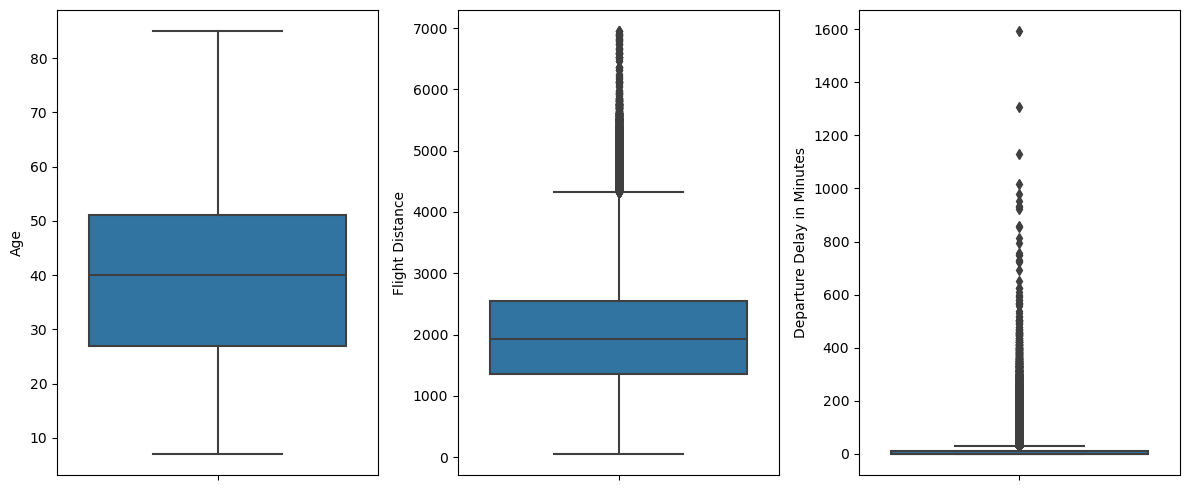

In [72]:
fig, ax = plt.subplots(1, 3, figsize = (12, 5))
sns.boxplot(y = df['Age'], ax = ax[0])
sns.boxplot(y = df['Flight Distance'], ax = ax[1])
sns.boxplot(y = df['Departure Delay in Minutes'], ax = ax[2])
plt.tight_layout()

In [74]:
def outlier_detection(df):
    """
    """
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    upper_end = Q3 + 1.5 * IQR
    lower_end = Q1 - 1.5 * IQR
    outliers = df[(df > upper_end) | (df < lower_end)]
    return outliers

In [ ]:
age (1, 100): -5000

In [102]:
out_lier = df.loc[outlier_detection(df['Departure Delay in Minutes']).index]

In [106]:
out_lier.index

Index([     1,     10,     14,     30,     41,     81,    126,    154,    175,
          192,
       ...
       129839, 129842, 129843, 129845, 129855, 129870, 129876, 129877, 129878,
       129879],
      dtype='int64', length=17970)

In [96]:
dataset2 = df.drop(index =outlier_detection(df['Departure Delay in Minutes']).index)

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,1,65,0,0,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0
2,1,1,15,0,0,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0
3,1,1,60,0,0,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0
4,1,1,70,0,0,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0
5,1,1,30,0,0,1894,0,0,0,3,2,0,2,2,5,4,5,5,4,2,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129869,1,0,55,0,0,1953,5,2,5,4,1,5,5,1,1,1,3,3,4,1,0,0.0
129871,1,0,35,0,0,3287,5,4,5,3,2,5,2,2,4,5,4,4,3,2,9,0.0
129872,1,0,69,0,0,2240,5,4,5,3,4,5,4,4,5,4,4,3,4,4,4,0.0
129874,1,0,11,0,0,2752,5,5,5,2,2,5,2,2,3,5,3,5,4,2,5,0.0


In [90]:
outlier_detection(df['Departure Delay in Minutes']).index

Index([     1,     10,     14,     30,     41,     81,    126,    154,    175,
          192,
       ...
       129839, 129842, 129843, 129845, 129855, 129870, 129876, 129877, 129878,
       129879],
      dtype='int64', length=17970)

In [52]:
df.nunique()

satisfaction                            2
Customer Type                           2
Age                                    75
Type of Travel                          2
Class                                   3
Flight Distance                      5397
Seat comfort                            6
Departure/Arrival time convenient       6
Food and drink                          6
Gate location                           6
Inflight wifi service                   6
Inflight entertainment                  6
Online support                          6
Ease of Online booking                  6
On-board service                        6
Leg room service                        6
Baggage handling                        5
Checkin service                         6
Cleanliness                             6
Online boarding                         6
Departure Delay in Minutes            464
Arrival Delay in Minutes              472
dtype: int64

In [48]:
x_test,

,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
15875,1,45,0,0,1789,2,4,3,2,2,3,2,2,5,4,5,3,4,2,0,0.0
37042,1,49,0,0,2202,4,5,4,2,4,3,3,4,4,4,4,3,5,3,152,153.0
29962,1,53,0,0,1769,1,1,1,1,5,4,3,5,5,5,5,5,5,3,20,5.0
74466,1,32,1,2,4776,2,1,3,1,2,2,2,2,1,5,3,1,4,2,0,0.0
80934,1,52,1,2,2281,5,5,5,5,1,3,2,3,3,3,3,4,3,4,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18005,1,51,0,0,2156,2,5,2,3,1,2,1,1,3,5,4,4,1,1,0,0.0
92190,1,49,1,2,382,2,2,2,2,4,4,2,4,4,4,4,1,4,5,6,0.0
56020,0,36,1,0,1628,3,4,3,4,2,3,2,2,2,2,3,3,4,2,0,0.0
119498,1,39,1,2,1742,1,1,1,1,3,4,4,5,5,5,5,4,5,5,0,10.0


In [ ]:
Multiple , error = y_actual - y_pred

In [36]:
from sklearn.metrics import confusion_matrix

In [38]:
y_pred = Logit.predict(x_test)

In [42]:
error = y_test==y_pred

In [44]:
error.value_counts()

satisfaction
True     24718
False     7654
Name: count, dtype: int64

In [46]:
24718/(24718+7654)

0.7635611021870753

In [ ]:
0 : Negative
1: Positive
True Negative: 0, False Positive 
False Negative , True Positive
Positive : 1

In [ ]:
[90, 10] = 100, True Negative
[50, 50] = 100,

In [ ]:
100: 90/(90+10)

In [112]:
(90+50)/(90+50+10+50)

0.7

In [ ]:
True Negative + True Positive/(True Negative+ TP+ FN+FP)

In [108]:
confusion_matrix(y_test,y_pred), 100, True Negative: 90, False Positive = 10

array([[ 9826,  4864],
       [ 2790, 14892]])

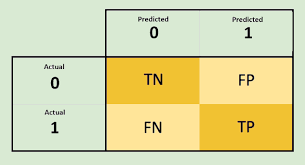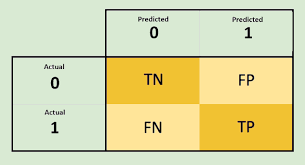

In [ ]:
recall 50, ,recall= 70, 100: True Positive : 70, Fn = 30, specificity_recall_0:90, 100: False Positive = 

In [122]:
def model_eval(y_true,y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true,y_pred).ravel()
    accuracy=(tp+tn)/(tp+tn+fp+fn)
    error = 1-accuracy
    recall=tp/(tp+fn)
    specificity=tn/(fp+tn)
    result={"Accuracy":accuracy,"Error":error,"Recall":recall,'Specificity':specificity}
    return result

In [124]:
model_eval(y_test, y_pred)

{'Accuracy': 0.7635611021870753,
 'Error': 0.2364388978129247,
 'Recall': 0.842212419409569,
 'Specificity': 0.6688904016337645}

In [ ]:
from sklearn.feature_selection import RFE

In [126]:
x_train

,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
10318,1,57,0,1,454,2,2,2,2,3,4,1,4,4,4,4,5,4,4,3,3.0
86437,1,20,1,2,2048,1,1,3,1,3,3,3,3,5,4,5,3,4,3,0,0.0
86757,1,40,1,0,1790,4,1,1,1,4,3,4,4,4,5,1,1,1,4,0,0.0
30993,1,60,0,1,1008,3,5,3,4,4,5,5,1,1,3,1,3,1,3,0,0.0
107523,1,54,1,2,1883,5,5,5,5,5,4,5,4,4,4,4,4,4,4,0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51760,0,36,1,2,1695,3,2,2,4,2,2,2,2,3,2,5,4,4,2,3,0.0
39790,1,70,0,0,428,5,5,5,3,5,4,2,5,5,5,5,5,5,4,14,11.0
77252,1,60,1,2,282,2,3,3,3,3,3,4,2,2,2,2,1,2,2,0,15.0
28104,1,39,0,0,3854,3,4,4,3,4,4,4,4,3,3,4,3,5,4,0,0.0


In [91]:
# !pip install explainerdashboard

In [95]:
from explainerdashboard import ClassifierExplainer, ExplainerDashboard
explainer = ClassifierExplainer(Logit, x_train, y_train)
ExplainerDashboard(explainer, port=434).run()

Note: model_output='probability' is currently not supported for linear classifiers models with shap. So defaulting to model_output='logodds' If you really need probability outputs use shap='kernel' instead.
Note: shap values for shap='linear' get calculated against X_background, but paramater X_background=None, so using X instead...
Generating self.shap_explainer = shap.LinearExplainer(model, X)...
Building ExplainerDashboard..
Detected notebook environment, consider setting mode='external', mode='inline' or mode='jupyterlab' to keep the notebook interactive while the dashboard is running...
For this type of model and model_output interactions don't work, so setting shap_interaction=False...
The explainer object has no decision_trees property. so setting decision_trees=False...
Generating layout...
Calculating shap values...
Calculating prediction probabilities...
Calculating metrics...
Calculating confusion matrices...
Calculating classification_dfs...
Calculating roc auc curves...
Ca

#### Feature Selection

In [98]:
from sklearn.feature_selection import RFE

In [102]:
n = int(input('Input the number of features you want to predict: '))

rfe = RFE(Logit, n_features_to_select= n)
rfe.fit(x_train, y_train)

Input the number of features you want to predict:  12


/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/opt/anaconda3/lib/python3.11/site-packa

RFE(estimator=LogisticRegression(), n_features_to_select=12)

In [104]:

selected_features = x_train[x_train.columns[rfe.support_]]

In [106]:
selected_features


,Customer Type,Class,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Checkin service
30760,1,0,2,2,4,2,5,4,5,5,5,3
47129,0,0,2,2,2,3,2,4,4,3,1,3
105912,1,2,4,3,1,3,4,3,4,4,4,3
82165,1,2,3,4,4,4,4,4,3,3,3,4
118678,1,2,1,1,1,1,5,5,5,5,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...
16857,1,0,2,5,2,1,2,4,4,4,4,5
51462,0,0,3,1,3,4,3,3,4,2,5,4
118730,1,1,5,1,1,1,5,5,5,5,1,1
58673,0,2,4,4,4,1,4,1,1,5,2,3


In [108]:
Logistic2 = LogisticRegression()

In [110]:
Logistic2.fit(selected_features, y_train)

LogisticRegression()

In [114]:
y_pred1 = Logistic2.predict(x_test[selected_features.columns])

In [116]:
model_eval(y_test, y_pred1)

{'Accuracy': 0.8240763622883974,
 'Error': 0.17592363771160258,
 'Precision': 0.8373349674112863,
 'Recall': 0.8441536560709874,
 'Specificity': 0.79953315941233}

In [118]:
from sklearn.metrics import classification_report

In [126]:
report = classification_report(y_test, y_pred1,output_dict=True )

In [130]:
report['0']['precision']

0.807572290409819

In [132]:
import mlflow

In [ ]:
mlflow.set_experiment('Testing Experiment')
mlflow.set_registry_uri('http://127.0.0.1:5000/')

with mlflow.start_run():
    mlflow.log_params

In [81]:
import statsmodels.api as sm
x_train_con = sm.add_constant(x_train)
Logit1 = sm.Logit(y_train, x_train_con).fit()

Optimization terminated successfully.
         Current function value: 0.404260
         Iterations 7


In [83]:
Logit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           satisfaction   No. Observations:                97115
Model:                          Logit   Df Residuals:                    97094
Method:                           MLE   Df Model:                           20
Date:                Tue, 03 Sep 2024   Pseudo R-squ.:                  0.4131
Time:                        21:35:25   Log-Likelihood:                -39260.
converged:                       True   LL-Null:                       -66894.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Customer Type                         1.5093      0.026     58.528      0.000       1.459       1.560
Age                                  -0.0065      0.001    -10.266      0.000      -0.008      -0.005
Type of Travel                       -7.8191      0.070   -111.615      0.000      -7.956      -7.682
Class                                 0.5507      0.010     55.647      0.000       0.531       0.570
Flight Distance                      -0.0001   9.48e-06    -15.076      0.000      -0.000      -0.000
Seat comfort                          0.2999      0.010     28.915      0.000       0.280       0.320
Departure/Arrival time convenient    -0.2487      0.008    -32.871      0.000      -0.264      -0.234
Food and drink                       -0.2090      0.011    -19.723      0.000      -0.230      -0.188
Gate location                         0.1431      0.009     16.692      0.000       0.126       0.160
Inflight wifi service                -0.1043      0.010    -10.398      0.000      -0.124      -0.085
Inflight entertainment                0.7216      0.009     77.513      0.000       0.703       0.740
Online support                        0.1121      0.010     11.154      0.000       0.092       0.132
Ease of Online booking                0.2947      0.013     22.713      0.000       0.269       0.320
On-board service                      0.2947      0.009     31.908      0.000       0.277       0.313
Leg room service                      0.2337      0.008     29.561      0.000       0.218       0.249
Baggage handling                      0.0601      0.010      5.779      0.000       0.040       0.080
Checkin service                       0.2669      0.008     34.531      0.000       0.252       0.282
Cleanliness                           0.0324      0.011      3.004      0.003       0.011       0.054
Online boarding                       0.1211      0.011     10.881      0.000       0.099       0.143
Departure Delay in Minutes            0.0024      0.001      2.600      0.009       0.001       0.004
Arrival Delay in Minutes             -0.0073      0.001     -8.196      0.000      -0.009      -0.006
=====================================================================================================
"""

In [87]:
df[num_columns]

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
0,65,265,0,0.0
1,47,2464,310,305.0
2,15,2138,0,0.0
3,60,623,0,0.0
4,70,354,0,0.0
...,...,...,...,...
129875,29,1731,0,0.0
129876,63,2087,174,172.0
129877,69,2320,155,163.0
129878,66,2450,193,205.0


##### Detecting Multicollinearity
A statistical technique called the **variance inflation factor (VIF)** can detect and measure the amount of collinearity in a multiple regression model.
- A VIF of 1 will mean that the variables are not correlated.
- A VIF between 1 and 5 shows that variables are moderately correlated.
- A VIF between 5 and 10 will mean that variables are highly correlated.
  
In practice, a VIF greater than 10 is often used as a rule of thumb to identify variables that may need to be removed or transformed to reduce multicollinearity.

**Check the number of satisfied customers in the dataset**

To predict customer satisfaction, check how many customers in the dataset are satisfied before modeling.

**Question:** How many satisfied and dissatisfied customers were there?

**Question:** What percentage of customers were satisfied?

**Question:** Should you remove rows where the `Arrival Delay in Minutes` column has missing values, even though the airline is more interested in the `inflight entertainment` column?

#### 3.2 Create the training and testing data

Put 70% of the data into a training set and the remaining 30% into a testing set. Create an X and y DataFrame with only the necessary variables.


**Question:** If you want to consider customer satisfaction with your model, should you train your model to use `inflight entertainment` as your sole independent variable? 

### 4. Model building

#### 4.1 Fit a LogisticRegression model with sklearn to the data

Build a logistic regression model and fit the model to the training data. 

#### 4.2 Building with statsmodel

### 5. Results and evaluation


##### Predict the outcome for the test dataset
Save these predictions as a variable called `y_pred`.

##### Print out `y_pred`

In order to examine the predictions, print out `y_pred`. 

 Use the `predict_proba` and `predict` functions on `X_test`

**Produce a confusion matrix**

Data professionals often like to know the types of errors made by an algorithm. To obtain this information, produce a confusion matrix.

**Question:** What stands out to you about the confusion matrix?

**Question:** Did you notice any difference in the number of false positives or false negatives that the model produced?

**Question:** What do you think could be done to improve model performance?

## Considerations
**What findings would you share with others?**
**What would you recommend to stakeholders?**